# Step1:Loading Dataset into MongoDB

In [3]:
!pip install pymongo
from pymongo import MongoClient
import json

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017')
db = client['Books']
collection = db['json']

# Load JSON data and insert into MongoDB
with open('Books.json') as f:
    data = json.load(f)
    collection.insert_many(data)


# Step2:Retriving Dataset from MongoDB and performing ETL process in python

In [5]:
import pandas as pd

# Retrieve data from MongoDB
cursor = collection.find()
data = list(cursor)

# Perform ETL using pandas
df = pd.DataFrame(data)
# Display the original DataFrame
df.head()

,_id,id,url,title,upc,product_type,price_excl_tax,price_incl_tax,tax,price,availability,num_reviews,stars,category,description
0,657721be9530ff4ca2daf661,1,https://books.toscrape.com/catalogue/a-light-i...,It's hard to imagine a world without A Light i...,a897fe39b1053632,books,52.0,52.0,0.0,52.0,22,0,3,poetry,"(""It's hard to imagine a world without A Light..."
1,657721be9530ff4ca2daf662,2,https://books.toscrape.com/catalogue/scott-pil...,Scott Pilgrim's life is totally sweet. He's 23...,3b1c02bac2a429e6,books,52.0,52.0,0.0,52.0,19,0,5,sequential art,('Scott Pilgrim\'s life is totally sweet. He\'...
2,657721be9530ff4ca2daf663,3,https://books.toscrape.com/catalogue/set-me-fr...,Aaron Ledbetter’s future had been planned out ...,ce6396b0f23f6ecc,books,17.0,17.0,0.0,17.0,19,0,5,young adult,('Aaron Ledbetter’s future had been planned ou...
3,657721be9530ff4ca2daf664,4,https://books.toscrape.com/catalogue/sapiens-a...,From a renowned historian comes a groundbreaki...,4165285e1663650f,books,54.0,54.0,0.0,54.0,20,0,5,history,('From a renowned historian comes a groundbrea...
4,657721be9530ff4ca2daf665,5,https://books.toscrape.com/catalogue/shakespea...,This book is an important and complete collect...,30a7f60cd76ca58c,books,21.0,21.0,0.0,21.0,19,0,4,poetry,('This book is an important and complete colle...


# step3:ETL PROCESS

In [15]:
# Drop unnecessary columns
df.drop(columns=['upc', 'url', 'tax', 'num_reviews'], inplace=True)

# Display the DataFrame after dropping columns
df.head()

,_id,id,title,product_type,price_excl_tax,price_incl_tax,price,availability,stars,category,description
0,657721be9530ff4ca2daf661,1,It's hard to imagine a world without A Light i...,books,52.0,52.0,52.0,22,3,poetry,"(""It's hard to imagine a world without A Light..."
1,657721be9530ff4ca2daf662,2,Scott Pilgrim's life is totally sweet. He's 23...,books,52.0,52.0,52.0,19,5,sequential art,('Scott Pilgrim\'s life is totally sweet. He\'...
2,657721be9530ff4ca2daf663,3,Aaron Ledbetter’s future had been planned out ...,books,17.0,17.0,17.0,19,5,young adult,('Aaron Ledbetter’s future had been planned ou...
3,657721be9530ff4ca2daf664,4,From a renowned historian comes a groundbreaki...,books,54.0,54.0,54.0,20,5,history,('From a renowned historian comes a groundbrea...
4,657721be9530ff4ca2daf665,5,This book is an important and complete collect...,books,21.0,21.0,21.0,19,4,poetry,('This book is an important and complete colle...


In [14]:
# Display unique values for selected columns
columns_to_display = ['availability', 'category', 'price', 'price_excl_tax', 'price_incl_tax', 'product_type', 'stars']

for column in columns_to_display:
    print(f"{column} ___________ {df[column].unique()}")

availability ___________ [22 19 20 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]
category ___________ ['poetry' 'sequential art' 'young adult' 'history' 'mystery' 'default'
 'fiction' 'business' 'historical fiction' 'politics' 'science fiction'
 'travel' 'music' 'childrens' 'romance' 'nonfiction' 'food and drink'
 'art' 'thriller' 'philosophy' 'spirituality' 'add a comment' 'new adult'
 'fantasy' 'contemporary' 'health' 'science' 'horror' 'self help'
 'religion' 'christian' 'crime' 'autobiography' 'christian fiction'
 'biography' 'womens fiction' 'cultural' 'erotica' 'humor' 'psychology'
 'historical' 'novels' 'suspense' 'short stories' 'classics' 'academic'
 'sports and games' 'adult fiction' 'parenting' 'paranormal']
price ___________ [52. 17. 54. 21. 48. 18. 50. 23. 33. 51. 14. 38. 45. 24. 57. 35. 55. 25.
 40. 31. 44. 53. 37. 20. 13. 34. 16. 56. 19. 26. 32. 49. 58. 43. 41. 42.
 39. 15. 46. 10. 36. 47. 22. 29. 28. 30. 60. 27. 11. 12. 59.]
price_excl_tax ___________ [52. 17. 

In [8]:
df

,_id,id,title,product_type,price_excl_tax,price_incl_tax,price,availability,stars,category,description
0,657721be9530ff4ca2daf661,1,It's hard to imagine a world without A Light i...,books,52.0,52.0,52.0,22,3,poetry,"(""It's hard to imagine a world without A Light..."
1,657721be9530ff4ca2daf662,2,Scott Pilgrim's life is totally sweet. He's 23...,books,52.0,52.0,52.0,19,5,sequential art,('Scott Pilgrim\'s life is totally sweet. He\'...
2,657721be9530ff4ca2daf663,3,Aaron Ledbetter’s future had been planned out ...,books,17.0,17.0,17.0,19,5,young adult,('Aaron Ledbetter’s future had been planned ou...
3,657721be9530ff4ca2daf664,4,From a renowned historian comes a groundbreaki...,books,54.0,54.0,54.0,20,5,history,('From a renowned historian comes a groundbrea...
4,657721be9530ff4ca2daf665,5,This book is an important and complete collect...,books,21.0,21.0,21.0,19,4,poetry,('This book is an important and complete colle...
...,...,...,...,...,...,...,...,...,...,...,...
1991,657722079530ff4ca2dafe29,994,"James Patterson, bestselling author of the Ale...",books,54.0,54.0,54.0,1,1,mystery,"(""James Patterson, bestselling author of the A..."
1992,657722079530ff4ca2dafe2a,995,"To the dismay of religious leaders, study afte...",books,28.0,28.0,28.0,1,4,religion,"('To the dismay of religious leaders, study af..."
1993,657722079530ff4ca2dafe2b,996,"In England’s Regency era, manners and elegance...",books,17.0,17.0,17.0,1,5,historical fiction,"('In England’s Regency era, manners and elegan..."
1994,657722079530ff4ca2dafe2c,997,Mary Shelley began writing Frankenstein when s...,books,38.0,38.0,38.0,1,2,default,"(""Mary Shelley began writing Frankenstein when..."


In [10]:
df.shape

(1996, 11)

# Step4:EDA Process

In [16]:
availability_distribution = df['availability'].value_counts()
print("Availability Distribution:\n", availability_distribution)

Availability Distribution:
 availability
3     392
14    272
1     194
15    172
16    168
5     130
7     106
8      94
4      94
6      70
12     68
11     56
9      50
19     46
2      28
18     22
13     10
17     10
20      8
10      4
22      2
Name: count, dtype: int64


In [17]:
category_counts = df['category'].value_counts()
print("\nCategory Counts:\n", category_counts)


Category Counts:
 category
default               302
nonfiction            220
sequential art        150
add a comment         134
fiction               130
young adult           108
fantasy                96
romance                70
mystery                64
food and drink         60
childrens              58
historical fiction     52
poetry                 38
history                36
classics               36
womens fiction         34
horror                 34
science fiction        32
science                28
music                  26
business               24
travel                 22
thriller               22
philosophy             22
humor                  20
autobiography          18
art                    16
religion               14
psychology             14
new adult              12
spirituality           12
christian fiction      12
self help              10
sports and games       10
biography              10
health                  8
christian               6
contempora

In [18]:
product_type_counts = df['product_type'].value_counts()
print("\nProduct Type Counts:\n", product_type_counts)


Product Type Counts:
 product_type
books    1996
Name: count, dtype: int64


In [19]:
x1=df.groupby('category')['price'].sum().sort_values(ascending=False)
x1

category
default               10396.0
nonfiction             7536.0
sequential art         5184.0
add a comment          4794.0
fiction                4686.0
young adult            3826.0
fantasy                3802.0
romance                2374.0
mystery                2028.0
childrens              1896.0
food and drink         1888.0
historical fiction     1756.0
poetry                 1366.0
history                1346.0
classics               1276.0
womens fiction         1252.0
horror                 1224.0
science fiction        1080.0
science                 926.0
music                   926.0
travel                  874.0
business                782.0
philosophy              736.0
thriller                692.0
humor                   674.0
autobiography           668.0
art                     616.0
new adult               554.0
psychology              476.0
religion                456.0
spirituality            422.0
health                  412.0
christian fiction       412.0
s

# Step5: load Analysed Data into Postgresql

In [20]:
import psycopg2

# Connect to PostgreSQL
conn = psycopg2.connect(database="books", user="vaish", password="Vaishnavi@2811", host="localhost", port="5432")
cur = conn.cursor()

# Export DataFrame to PostgreSQL
df.to_sql(name='books', con=conn, if_exists='replace', index=False)

# Commit and close connection
conn.commit()
conn.close()
print("\n Data added sucessfully \n",)


 Data added sucessfully 



# Step6:Retrive Analysed Data From Postgresql and visualise in python

C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


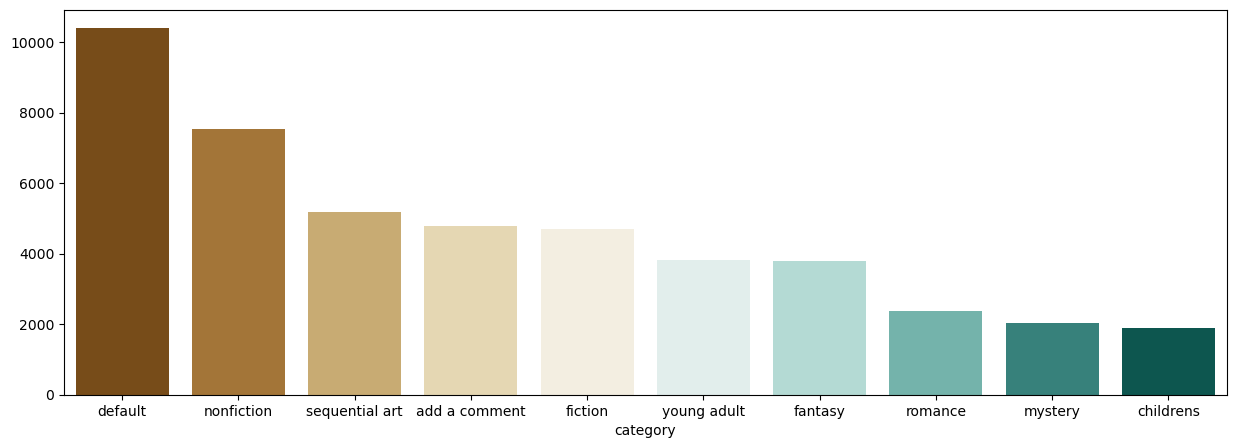

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Connect to PostgreSQL
conn = psycopg2.connect(database="books", user="vaish", password="Vaishnavi@2811", host="localhost", port="5432")

# Query data
query = "SELECT * FROM books"
df = pd.read_sql_query(query, conn)

category_sum = df.groupby('category')['price'].sum().sort_values(ascending=False)
top_10_categories = category_sum.head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values,palette=("BrBG"))
plt.show()

conn.close()

C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


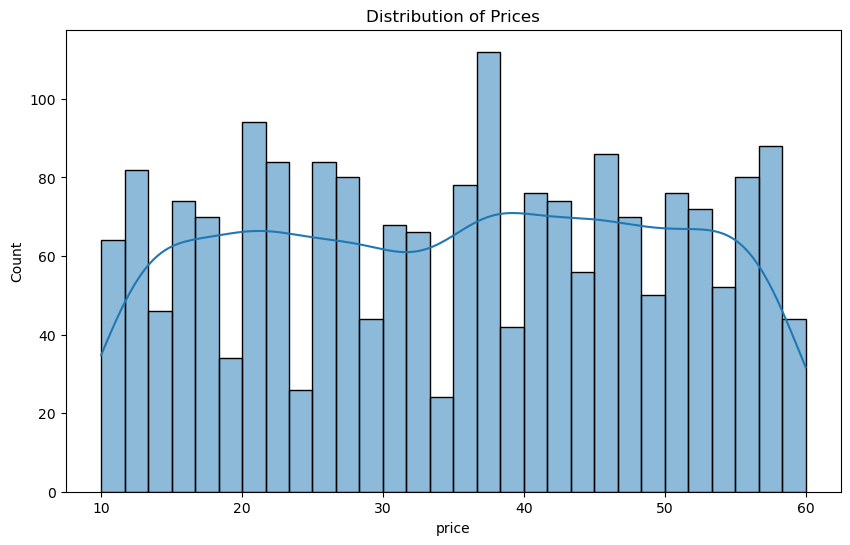

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()

In [24]:
df['stars'].value_counts()

stars
1    450
3    404
5    392
2    392
4    358
Name: count, dtype: int64

C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='stars', ylabel='count'>

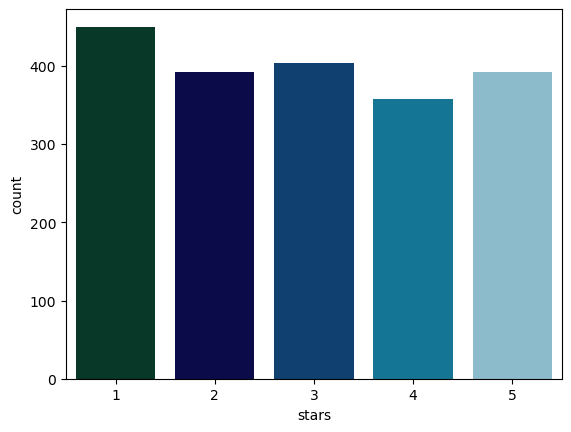

In [25]:
sns.countplot(x='stars',palette='ocean',data=df)

In [26]:
df.groupby('category')['stars'].agg({'min', 'max', 'mean'})

,max,min,mean
category,,,
academic,2,2,2.000000
add a comment,5,1,2.761194
adult fiction,5,5,5.000000
art,5,2,3.625000
autobiography,5,1,3.000000
biography,3,1,2.200000
business,5,1,2.916667
childrens,5,1,2.620690
christian,5,1,2.666667


C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


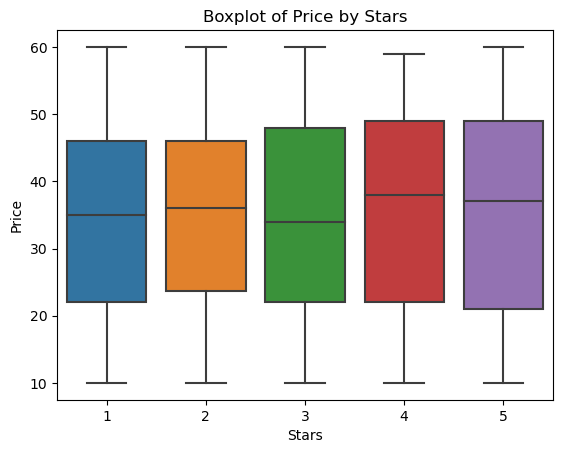

In [27]:
sns.boxplot(x='stars', y='price', data=df)
plt.xlabel('Stars')
plt.ylabel('Price')
plt.title('Boxplot of Price by Stars')
plt.show()

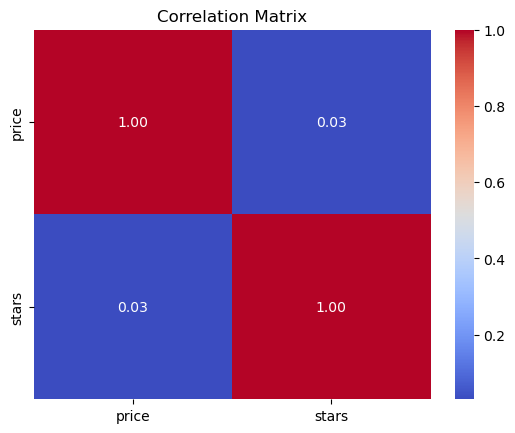

In [28]:
correlation_matrix = df[['price', 'stars']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


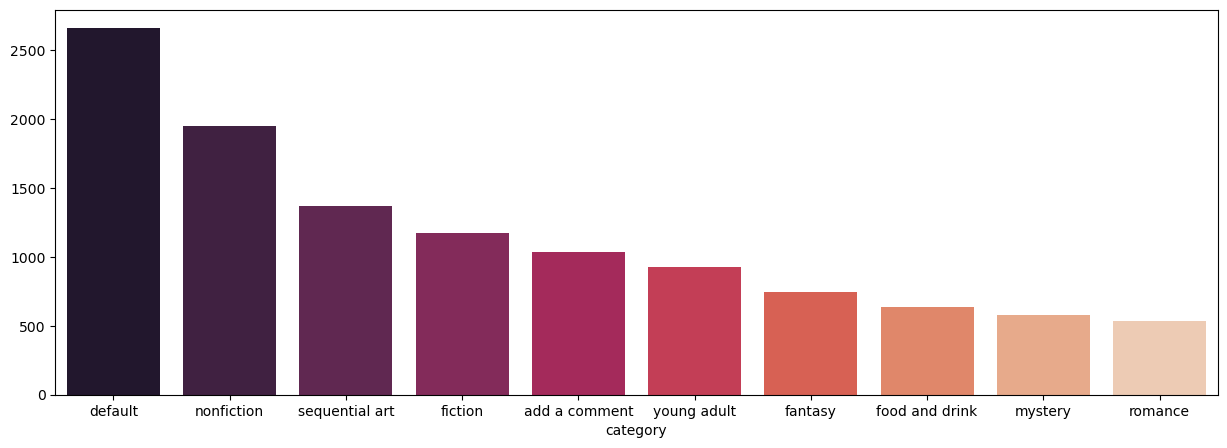

In [29]:
availability_sum=df.groupby('category')['availability'].sum().sort_values(ascending=False)
top_10_categories = availability_sum.head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values,palette=("rocket"))
plt.show()

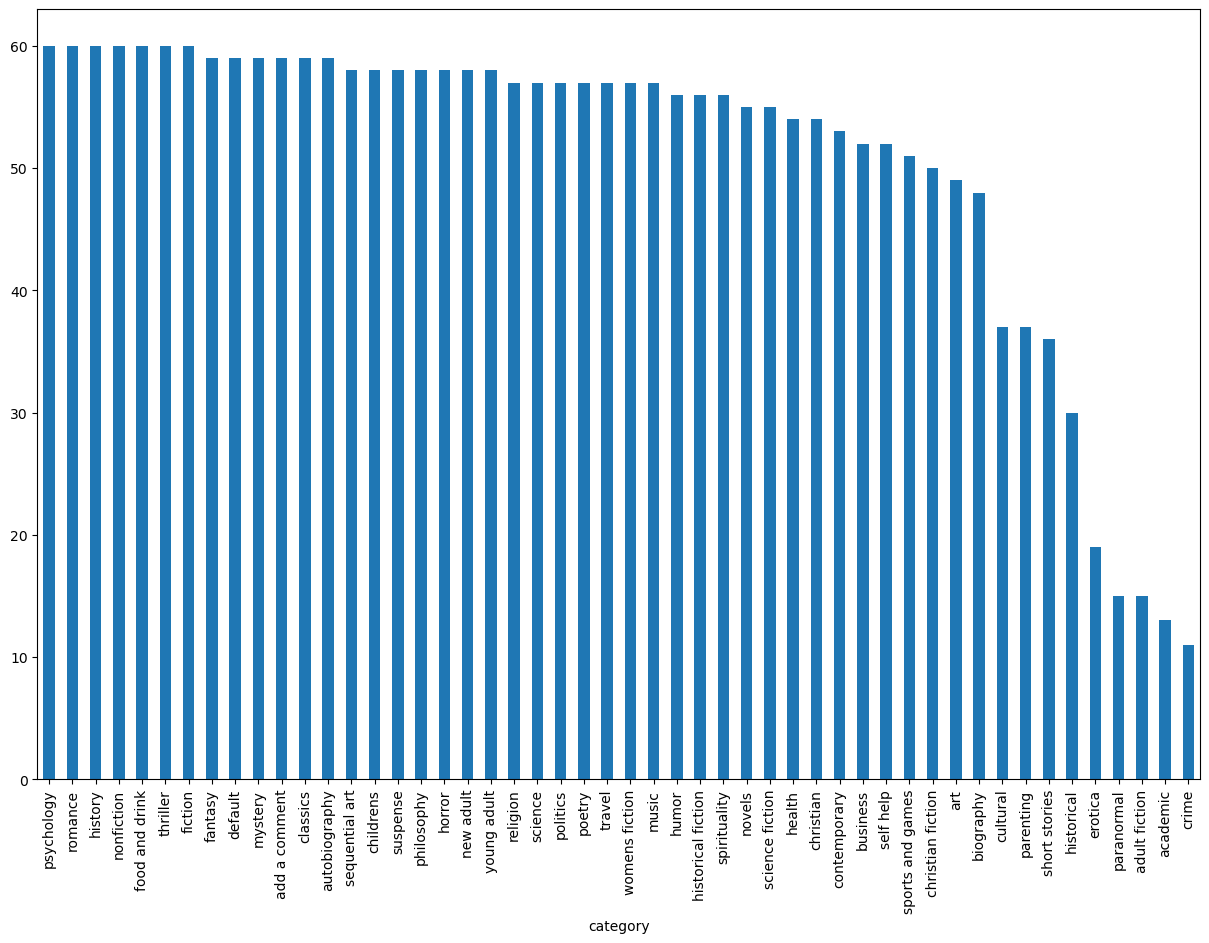

In [30]:
plt.figure(figsize=(15,10))
df.groupby('category')['price'].max().sort_values(ascending=False).plot(kind='bar');